In [81]:
import nibabel 
import numpy as np
from glob import glob
import os
# The prediction will produce a npy file containing the probability to belong to a class for each voxel
# so we need to set each voxel to the class with the highest probability
# and then save the segmentation as nifti file

# Function to set each voxel to the class with the highest probability
def to_lbl(pred):
    # pred.shape = (num_classes, depth , height, width)
    print(pred.shape)
    pred = np.argmax(pred, axis=0)
    # Transpose to be  (height, width, depth)
    pred = np.transpose(pred, (2, 1, 0)).astype(np.uint8)
    print(pred.shape)
    return pred

# Function to save the predicted segmentation as nifti file
def prepare_preditions(e):
    fname = e[0].split("/")[-1].split(".")[0]
    preds = [np.load(f) for f in e]
    p = to_lbl(np.mean(preds, 0))


    # img is the input volumes stacked together ,needed so that the saved prediction have the same affine (map voxel coordinates to real-world coordinates) and header (contains metadata information about the image)
    img = nibabel.load(f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/{fname}.nii.gz")
    nibabel.save(
        nibabel.Nifti1Image(p, img.affine, header=img.header),
        os.path.join("/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/without/test_results/results", fname + ".nii.gz"),
    )

In [82]:
preds = sorted(glob(f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/without/test_results/predictions_epoch=13-dice=82_50_task=11_fold=0_tta*"))
examples = list(zip(*[sorted(glob(f"{p}/*.npy")) for p in preds]))
print("Preparing final predictions")
for e in examples:
    prepare_preditions(e)
print("Finished!")

Preparing final predictions
(4, 155, 240, 240)
(240, 240, 155)
Finished!


In [9]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

def read_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

def generate_legend(color_map, labels):
    legend_elements = [Patch(color=color_map[label], label=f"Label {label}") for label in labels]
    return legend_elements

def visualize_segmentation(image, segmentation, color_map, slice_no,flag):
    unique_labels = np.unique(segmentation)
    
    # Display original image
    plt.subplot(1, 2, 1)
    if flag:
        plt.imshow(image[:,:,slice_no,0], cmap='gray')
    else:     
        plt.imshow(image[:,:,slice_no], cmap='gray')

    plt.title("Original Image")

    # Display segmentation
    plt.subplot(1, 2, 2)
    overlay = np.zeros_like(segmentation)

    for label in unique_labels:
        mask = (segmentation == label)
        overlay[mask] = label

    cmap = ListedColormap([color_map[label] for label in unique_labels])
    plt.imshow(overlay[:,:,slice_no], cmap=cmap, vmin=0, vmax=len(color_map)-1)
    plt.title("Segmentation Overlay")

    # Display legend
    legend_elements = generate_legend(color_map, unique_labels)
    plt.legend(handles=legend_elements, loc='upper right')

    plt.show()

---------------------------
Test set

Segmentation Dimensions: (240, 240, 155)


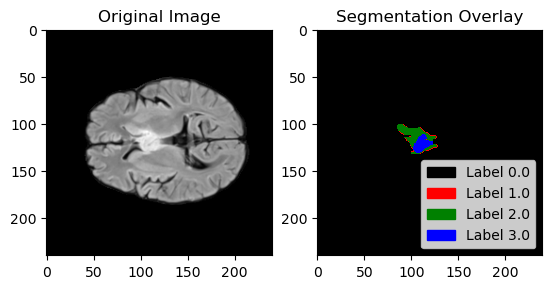

In [32]:
# BraTS Africa
#  ground truth
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels/BraTS2021_0{fname}_seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


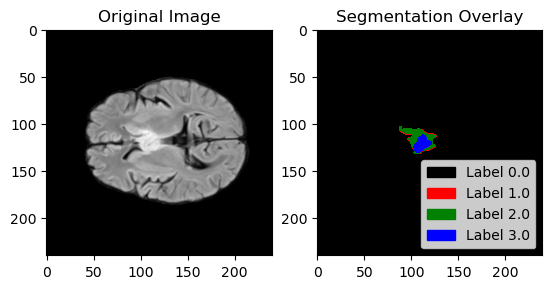

In [19]:
# BraTS Africa
#  before
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/test_results/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


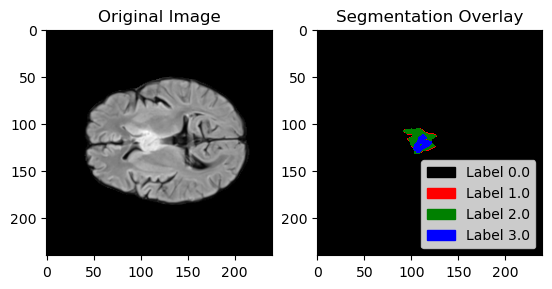

In [33]:
# BraTS Africa
# with
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/test_results/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


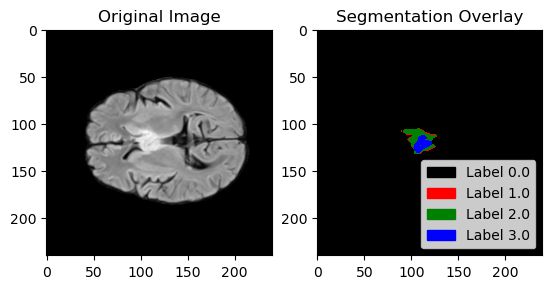

In [39]:
# BraTS Africa
# without
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/test_results/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


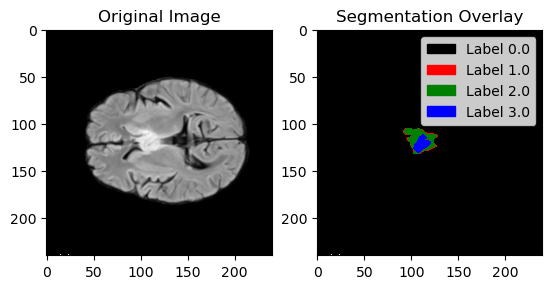

In [70]:
# BraTS Africa
# Fine Tuning
# with
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/with/test_results/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


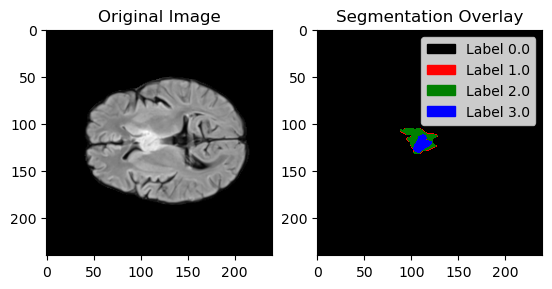

In [76]:
# BraTS Africa
# Fine Tuning
# without
fname = 1677
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/without/test_results/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

------------------------
valisation set


Segmentation Dimensions: (240, 240, 155)


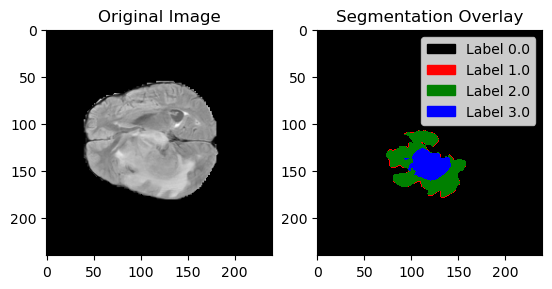

In [47]:
# BraTS 2021
#  ground truth
fname = 1661
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/labels/BraTS2021_0{fname}_seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


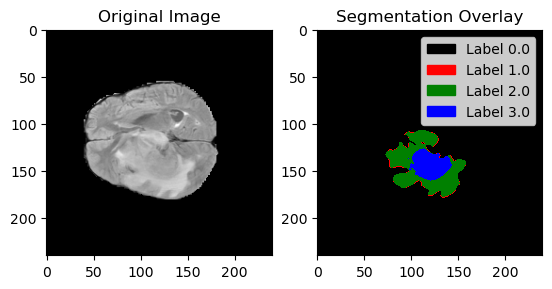

In [48]:
# BraTS 2021
#  before
fname = 1661
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/resultsValidation/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


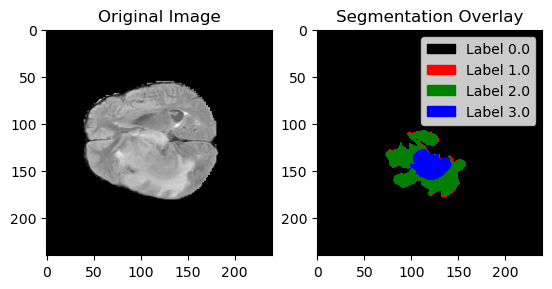

In [54]:
# BraTS 2021
#  with
fname = 1661
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/resultsValidation/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

Segmentation Dimensions: (240, 240, 155)


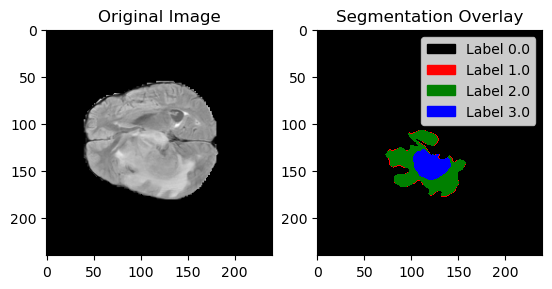

In [61]:
# BraTS 2021
#  without
fname = 1661
image_path = f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/images/BraTS2021_0{fname}.nii.gz"
segmentation_path =  f"/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/resultsValidation/results/BraTS2021_0{fname}.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, image_data.shape[2] // 2, 1)

--------------------------------------------

In [2]:
import os
import nibabel as nib
import numpy as np

def dice_score(prediction_folder, ground_truth_folder, labels=[1, 2, 3], output_file="average_dice_scores.txt"):
    dice_scores = {}

    # Get a list of all prediction files
    prediction_files = [f for f in os.listdir(prediction_folder) if f.endswith(".nii.gz")]

    for prediction_file in prediction_files:
        # Construct the corresponding ground truth file name
        gt_file = prediction_file.replace(".nii.gz", "_seg.nii.gz")

        # Full paths to the prediction and ground truth files
        prediction_path = os.path.join(prediction_folder, prediction_file)
        ground_truth_path = os.path.join(ground_truth_folder, gt_file)

        # Load NIfTI files
        prediction = nib.load(prediction_path).get_fdata()
        ground_truth = nib.load(ground_truth_path).get_fdata()

        
        for label in labels:
            # Create binary masks for the current label
            pred_mask = (prediction == label)
            gt_mask = (ground_truth == label)

            # Calculate Dice coefficient
            intersection = np.sum(np.logical_and(pred_mask, gt_mask))
            union = np.sum(np.logical_or(pred_mask, gt_mask))

            # because some samples have no non-enhancing tumor (label 1) and lead to division by zero
            if (union + intersection == 0):
                dice = 0
            else:
                dice = (2.0 * intersection) / (union + intersection)

            label_key = f"Label_{label}"
            if label_key not in dice_scores:
                dice_scores[label_key] = []

            dice_scores[label_key].append(dice)

    # Calculate average Dice scores
    average_dice_scores = {}
    for label, scores in dice_scores.items():
        average_dice_scores[label] = np.mean(scores)

    # Save average Dice scores to a text file
    with open(output_file, "w") as file:
        for label, score in average_dice_scores.items():
            file.write(f"{label}: {score}\n")

    return average_dice_scores




------------------------------------------
# Validation Set

In [50]:
# before
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/resultsValidation/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/nvidia_val_average_dice_scores_before_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7597997180265115, 'Label_2': 0.8393152256536163, 'Label_3': 0.8399055860105138}


In [56]:
# with
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/resultsValidation/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/nvidia_val_average_dice_scores_before_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7551338875324475, 'Label_2': 0.8325202987674638, 'Label_3': 0.8304094908230786}


In [64]:
# without
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/resultsValidation/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/dataValidation/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/nvidia_val_average_dice_scores_before_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7473207221521057, 'Label_2': 0.8306421137966445, 'Label_3': 0.8319706067550029}


--------------------------------------------------------------------------------------
# Test Set

In [21]:
# Before:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/test_results/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/before/nvidia_test_average_dice_scores_before_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.710401813969401, 'Label_2': 0.7987690393501545, 'Label_3': 0.8174094252846394}


In [35]:
# with:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/test_results/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/with/nvidia_test_average_dice_scores_with_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7104299825746786, 'Label_2': 0.7922199866104116, 'Label_3': 0.8176761897467074}


In [40]:
# without:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/test_results/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/without/nvidia_test_average_dice_scores_without_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7019544178805608, 'Label_2': 0.7690026252766564, 'Label_3': 0.7878122879683304}


In [72]:
# Fine Tuning
# with:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/with/test_results/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/with/nvidia_test_average_dice_scores_with_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.7191637915209652, 'Label_2': 0.793204211408451, 'Label_3': 0.8106382074418901}


In [80]:
# Fine Tuning
# without:
prediction_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/without/test_results/results"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/test_set/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/NVIDIA_TRIAL2/fineTuning/without/nvidia_test_average_dice_scores_without_AL.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.740793329395515, 'Label_2': 0.7892174462231113, 'Label_3': 0.8374498049395882}


------------------------------------------

In [7]:
import os
import torch
import nibabel as nib
import numpy as np

def compute_stats_from_nifti_folder(prediction_folder, ground_truth_folder, n_class):
    dice_scores = {label: [] for label in range(1, n_class + 1)}

    prediction_files = os.listdir(prediction_folder)
    ground_truth_files = os.listdir(ground_truth_folder)

    for prediction_file in prediction_files:
        if prediction_file.endswith(".nii.gz"):
            prediction_path = os.path.join(prediction_folder, prediction_file)
            gt_file = prediction_file.replace(".nii.gz", "_seg.nii.gz")
            ground_truth_path = os.path.join(ground_truth_folder, gt_file)

            dice_scores_per_file = compute_stats_from_nifti(prediction_path, ground_truth_path, n_class)

            for label, score in dice_scores_per_file.items():
                dice_scores[label].append(score)

    mean_dice_scores = {label: np.mean(scores) for label, scores in dice_scores.items()}
    return mean_dice_scores

def compute_stats_from_nifti(prediction_path, ground_truth_path, n_class):
    prediction = nib.load(prediction_path).get_fdata().astype(np.int64)
    ground_truth = nib.load(ground_truth_path).get_fdata().astype(np.int64)

    dice_scores = {}
    for label in range(1, n_class + 1):
        dice_scores[label] = compute_dice_score(prediction, ground_truth, label)

    return dice_scores

def get_stats(p, y, c):
    p_tensor = torch.from_numpy(p)
    y_tensor = torch.from_numpy(y)
    tp = torch.logical_and(p_tensor == c, y_tensor == c).sum()
    fn = torch.logical_and(p_tensor != c, y_tensor == c).sum()
    fp = torch.logical_and(p_tensor == c, y_tensor != c).sum()
    return tp, fn, fp

def compute_dice_score(prediction, ground_truth, label):
    tp, fn, fp = get_stats(prediction, ground_truth, label)

    intersection = tp
    union = tp + fn + fp

    if union + intersection == 0:
        return 0
    else:
        return (2.0 * intersection) / (union + intersection)

# Example usage:
prediction_folder = "/media/workstation04/New Volume/MMMAI/trial/res"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/trial/data/BraTS2021_train/labels"
n_class = 3

mean_dice_scores = compute_stats_from_nifti_folder(prediction_folder, ground_truth_folder, n_class)
for label, mean_dice in mean_dice_scores.items():
    print(f"Mean Dice score for label {label}: {mean_dice}")


Mean Dice score for label 1: 0.9649761319160461
Mean Dice score for label 2: 0.7041343450546265
Mean Dice score for label 3: 0.9529160261154175


In [11]:
prediction_folder = "/media/workstation04/New Volume/MMMAI/trial/res"
ground_truth_folder = "/media/workstation04/New Volume/MMMAI/trial/data/BraTS2021_train/labels"
output_file="/media/workstation04/New Volume/MMMAI/trial/try.txt"
dice_score_avg = dice_score(prediction_folder, ground_truth_folder, output_file = output_file)
print(dice_score_avg)

{'Label_1': 0.964976159514521, 'Label_2': 0.7041343215427307, 'Label_3': 0.9529160215291602}
